# Ford GoBike System Data Analysis
## by Abhijeet Kothari

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [75]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from math import sin, cos, sqrt, atan2,radians

%matplotlib inline

In [76]:
#loading data set into the dataframe
ford_go_bike_raw=pd.read_csv('2017-fordgobike-tripdata.csv')
ford_go_bike_raw.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female


<br>

### Assessment 

In [77]:
#let's look at the general structure of the dataframe
ford_go_bike_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


>**Observations:**
>
>`start_time` and `end_time` features are in string datatype. They should be in the datatime datatype.<br>
>`member_birth_year` feature is in float datatype. It should be in the string datatype.<br>
>`user_type` and `member_gender` features in the string datatype. They should be in categorical datatype. <br>
>`member_birth_year` and `member_gender` features have null values.<br>



In [78]:
#checking for duplicate rows
sum(ford_go_bike_raw.duplicated())

0

In [79]:
#checking properties of 'duration_sec' columns
ford_go_bike_raw.duration_sec.describe()

count    519700.000000
mean       1099.009521
std        3444.146451
min          61.000000
25%         382.000000
50%         596.000000
75%         938.000000
max       86369.000000
Name: duration_sec, dtype: float64

In [80]:
#checking start stations names
ford_go_bike_raw.start_station_name.value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)                 15187
The Embarcadero at Sansome St                                      13664
San Francisco Caltrain (Townsend St at 4th St)                     12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)          12055
Market St at 10th St                                               11960
Montgomery St BART Station (Market St at 2nd St)                   11334
Berry St at 4th St                                                 10956
Powell St BART Station (Market St at 4th St)                       10142
Howard St at Beale St                                               9926
Steuart St at Market St                                             9347
Powell St BART Station (Market St at 5th St)                        7987
Embarcadero BART Station (Beale St at Market St)                    7649
2nd St at Townsend St - Coming Soon                                 6605
3rd St at Townsend St                              

In [81]:
#checking end stations names
ford_go_bike_raw.end_station_name.value_counts()

San Francisco Caltrain (Townsend St at 4th St)                     17378
San Francisco Ferry Building (Harry Bridges Plaza)                 17109
The Embarcadero at Sansome St                                      16531
San Francisco Caltrain Station 2  (Townsend St at 4th St)          13658
Montgomery St BART Station (Market St at 2nd St)                   13443
Market St at 10th St                                               11298
Powell St BART Station (Market St at 4th St)                       11064
Berry St at 4th St                                                 10611
Steuart St at Market St                                             9321
Powell St BART Station (Market St at 5th St)                        8563
Howard St at Beale St                                               7791
2nd St at Townsend St - Coming Soon                                 7277
Townsend St at 7th St                                               6681
Embarcadero BART Station (Beale St at Market St)   

>No abnormilities found in `start_station_id` and `start_station_name`,`end_station_id` and `end_station_name`

In [82]:
#checkin user type
ford_go_bike_raw.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [83]:
#checking member birth year
ford_go_bike_raw.member_birth_year.value_counts()

1985.0    24342
1988.0    23610
1987.0    22493
1984.0    21061
1982.0    21005
1986.0    20134
1983.0    19270
1989.0    19202
1990.0    16832
1991.0    16009
1981.0    15132
1980.0    14817
1993.0    13394
1979.0    12691
1992.0    11928
1977.0    11798
1975.0    11454
1978.0    10845
1994.0     9932
1973.0     9230
1974.0     9186
1968.0     9038
1976.0     8782
1965.0     7926
1971.0     7892
1970.0     7599
1967.0     6650
1972.0     6645
1995.0     6616
1969.0     6556
          ...  
1957.0     1525
1955.0     1082
1952.0      960
1999.0      899
1951.0      745
1950.0      740
1953.0      596
1947.0      534
1949.0      500
1948.0      464
1945.0      280
1944.0      231
1902.0      217
1943.0      188
1900.0      142
1935.0      134
1946.0       82
1942.0       73
1924.0       66
1941.0       57
1933.0       41
1939.0       37
1934.0       34
1928.0       29
1940.0       29
1938.0       22
1911.0       12
1907.0        7
1901.0        4
1886.0        2
Name: member_birth_year,

In [84]:
#checking member birth year's min and max
ford_go_bike_raw.member_birth_year.min(), ford_go_bike_raw.member_birth_year.max()

(1886.0, 1999.0)

>**Observation:**
>Users are present which have age more than 100 years. Seems abnormal. Will delete all the entries where age of user excedes 100 years.

In [85]:
#checking member gender
ford_go_bike_raw.member_gender.value_counts()

Male      348318
Female     98621
Other       6299
Name: member_gender, dtype: int64

<br>

**Quality Issues:**
1. `start_time` and `end_time` features are in the string format. They should be in the datetime format.<br>
2. `member_birth_year` feature is in float format. It should be in the string format.<br>
3.  `user_type` and `member_gender` features are in string datatype instead of categorical data type.
3. `member_birth_year` and `member_gender` features have null values.<br>
4. Users having age more than 100 years are present. Seems abnormal. Will delete all the entries where age excedes 100 years. <br>


### Cleaning:

In [86]:
#creating copy of the dataframe
ford_go_bike=ford_go_bike_raw.copy()

**_Define:_**

Remove rows from the dataframe where null values are present in columns `member_birth_year` and `member_gender`.

**_Code:_**

In [87]:
ford_go_bike.dropna(inplace=True)

**_Test:_**:

In [88]:
ford_go_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null object
end_time                   453159 non-null object
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null object
member_birth_year          453159 non-null float64
member_gender              453159 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 55.3+ MB


<br>

**_Define:_**

Change data type of `start_time` and `end_time` columns to datetime datatype, `member_birth_year` column to string datatype and `member_gender` and `user_type` to category data type.

**_Code:_**

In [89]:
ford_go_bike['start_time']=pd.to_datetime(ford_go_bike.start_time)
ford_go_bike['end_time']=pd.to_datetime(ford_go_bike.end_time)

ford_go_bike['member_birth_year']=ford_go_bike.member_birth_year.astype(str)
ford_go_bike['member_birth_year']=ford_go_bike.member_birth_year.apply(lambda x: x[:-2])  #removing decimal precision

ford_go_bike['user_type'] = ford_go_bike.user_type.astype('category')
ford_go_bike['member_gender'] = ford_go_bike.member_gender.astype('category')

**_Test:_**:

In [90]:
ford_go_bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                  object
member_gender                    category
dtype: object

<br>

**_Define:_**

Remove rows where user age excedes 100 years.

**_Code:_**

In [91]:
#number of rows where user's age excedes 100 years
ford_go_bike[ford_go_bike.member_birth_year.apply(lambda x: 2017-int(x)>100)].shape[0]

384

In [92]:
#saving index of all the entries
indexes_to_be_deleted=ford_go_bike[ford_go_bike.member_birth_year.apply(lambda x: 2017-int(x)>100)].index
indexes_to_be_deleted

Int64Index([   287,   1751,   3119,   3259,   5246,   7183,   8077,   9838,
             10712,  13035,
            ...
            510055, 511659, 512160, 514200, 514556, 517299, 517916, 518374,
            518808, 519345],
           dtype='int64', length=384)

In [93]:
#deleting rows
ford_go_bike.drop(index=indexes_to_be_deleted,inplace=True)

**_Test:_**:

In [94]:
#number of rows where user's age excedes 100 years
ford_go_bike[ford_go_bike.member_birth_year.apply(lambda x: 2017-int(x)>100)].shape[0]

0

___

**Adding 3 new columns in the dataframe in order to simplify exploration**

In [95]:
#1) create a new variable "distance", calculated using latitude and longitude of start point and end point
def calculate_distance(df):
    R = 6378.0 #radius of the earth

    lat1 = radians(df['start_station_latitude'])
    lon1 = radians(df['start_station_longitude'])
    lat2 = radians(df['end_station_latitude'])
    lon2 = radians(df['end_station_longitude'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c 
    return distance

ford_go_bike['distance_in_km'] = ford_go_bike.apply(calculate_distance,axis=1)

In [96]:
#2) create one column for age
ford_go_bike['age']=ford_go_bike.member_birth_year.apply(lambda x: 2017-int(x))

In [97]:
#3) create one column for age_group
def assign_age_group(age):
    
    age_group=np.nan
    
    if age<18:
        age_group='Under 18'
    
    elif 18<=age<=35:
        age_group='18-35'
    
    elif 36<=age<=54:
        age_group='36-54'

    else:
        age_group='55 or more'
    
    return age_group

ford_go_bike['age_group']=ford_go_bike.age.apply(assign_age_group)

In [98]:
#convert 'duration_sec' into minutes for better interpretibility and aslo changing column name
ford_go_bike.duration_sec=ford_go_bike.duration_sec.apply(lambda x: x/60)
ford_go_bike.rename(columns={'duration_sec':'duration_in_min'},inplace=True)

In [99]:
#Now we are ready for exploration. Let's have a look on or updated dataframe once
ford_go_bike.head()

,duration_in_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,distance_in_km,age,age_group
0,1335.166667,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,0.943967,30,18-35
1,1313.333333,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,3.073100,52,36-54
4,726.716667,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,0.637039,20,18-35
6,75.116667,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991,Female,0.000000,26,18-35
12,36.383333,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male,1.519016,27,18-35


In [100]:
#and datatypes of the columns are:
ford_go_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452775 entries, 0 to 519699
Data columns (total 18 columns):
duration_in_min            452775 non-null float64
start_time                 452775 non-null datetime64[ns]
end_time                   452775 non-null datetime64[ns]
start_station_id           452775 non-null int64
start_station_name         452775 non-null object
start_station_latitude     452775 non-null float64
start_station_longitude    452775 non-null float64
end_station_id             452775 non-null int64
end_station_name           452775 non-null object
end_station_latitude       452775 non-null float64
end_station_longitude      452775 non-null float64
bike_id                    452775 non-null int64
user_type                  452775 non-null category
member_birth_year          452775 non-null object
member_gender              452775 non-null category
distance_in_km             452775 non-null float64
age                        452775 non-null int64
age_group        

</br>

### What is the structure of your dataset?

1) There are 4,52,775 trips details in the dataset with 18 features (`duration_in_min', 'start_time', 'end_time`, `start_station_id`,`start_station_name`, `start_station_latitude`,`start_station_longitude`, `end_station_id`, `end_station_name`,`end_station_latitude`, `end_station_longitude`, `bike_id`, `user_type`,`member_birth_year`, `member_gender`, `distance`, `age`, `age_group`). <br><br>
    2) Most variables are numeric in nature and few are string and few are categorical in nature. `age_group` variable is an ordered factor variables with the following levels.<br>
(young) ——> (old)<br>
'Under 18', '18-35', '36-54', '55 and more'.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the duration of the trips in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that distance will have the strongest effect on each trip's duration: the larger the distacne, the higher the duration. I also think that the other factors: day of trip, usertype, gender, age, age group will have effects on the duration, though to a much smaller degree than the main effect of distance.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: duration.

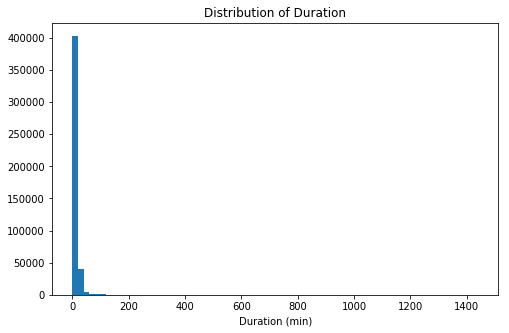

In [101]:
# start with a standard-scaled plot
binsize =20
bins = np.arange(0, ford_go_bike['duration_in_min'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = ford_go_bike, x = 'duration_in_min', bins = bins)
plt.xlabel('Duration (min)')
plt.title('Distribution of Duration')

plt.show()

>**Observation:** 
>
>I can see that outliers are present in the data. And due to these outliers, plot got shfited in the left side. I need to look if these outliers are valid or not. If they arn't valid, I will remove them and if they are valid, I will shrink the xscale of the plot to see more from the plot.

**checking for outliers:**

In [102]:
#let's look at the trips where duration is more than 200 mins
df_long_dur=ford_go_bike[ford_go_bike.duration_in_min>200]
df_long_dur

,duration_in_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,distance_in_km,age,age_group
0,1335.166667,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,0.943967,30,18-35
1,1313.333333,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,3.073100,52,36-54
4,726.716667,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,0.637039,20,18-35
320,462.716667,2017-12-31 10:14:07.090,2017-12-31 17:56:50.924,258,University Ave at Oxford St,37.872355,-122.266447,246,Berkeley Civic Center,37.869060,-122.270556,3607,Customer,1996,Female,0.514758,21,18-35
323,398.500000,2017-12-31 11:13:00.174,2017-12-31 17:51:30.912,31,Raymond Kimbell Playground,37.783813,-122.434559,36,Folsom St at 3rd St,37.783830,-122.398870,2001,Customer,1990,Female,3.139801,27,18-35
444,390.216667,2017-12-31 10:12:58.813,2017-12-31 16:43:11.922,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,324,Union Square (Powell St at Post St),37.788300,-122.408531,3025,Customer,1966,Male,0.852467,51,36-54
1088,1236.716667,2017-12-30 15:32:40.256,2017-12-31 12:09:23.899,200,2nd Ave at E 18th St,37.800214,-122.253810,200,2nd Ave at E 18th St,37.800214,-122.253810,3693,Subscriber,1978,Male,0.000000,39,36-54
1092,1297.033333,2017-12-30 14:30:43.823,2017-12-31 12:07:46.184,123,Folsom St at 19th St,37.760594,-122.414817,10,Washington St at Kearny St,37.795393,-122.404770,1353,Customer,1983,Female,3.973338,34,18-35
1143,1008.666667,2017-12-30 18:52:23.937,2017-12-31 11:41:04.448,126,Esprit Park,37.761634,-122.390648,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,796,Subscriber,1979,Female,0.977798,38,36-54
2025,206.816667,2017-12-30 11:45:03.725,2017-12-30 15:11:52.806,116,Mississippi St at 17th St,37.764802,-122.394771,90,Townsend St at 7th St,37.771058,-122.402717,1758,Customer,1983,Female,0.986817,34,18-35


In [103]:
#if the values in 'duration_in_min' column is correct then  (end time-start time) of trip should yeild the same result

#caluclating (end time-start time) in  mins for each trip for the dataframe 'df_long_dur'
time_in_hours=df_long_dur.end_time-df_long_dur.start_time
time= pd.DatetimeIndex(time_in_hours)
calculated_mins=time.hour * 60 + time.minute+(time.second/60)

#only keeping integer part of the result
calculated_mins=calculated_mins.astype(int)

#now comparing the 'duration_in_min'column to the result
df_long_dur[df_long_dur.duration_in_min.astype(int)!=calculated_mins.astype(int)]

,duration_in_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,distance_in_km,age,age_group
166700,1410.666667,2017-11-04 16:08:38.306,2017-11-05 14:39:18.340,70,Central Ave at Fell St,37.773311,-122.444293,29,O'Farrell St at Divisadero St,37.782405,-122.439446,3061,Customer,1989,Male,1.098441,28,18-35
167167,1245.633333,2017-11-04 16:40:52.734,2017-11-05 12:26:31.096,52,McAllister St at Baker St,37.777416,-122.441838,29,O'Farrell St at Divisadero St,37.782405,-122.439446,1106,Customer,1992,Female,0.593881,25,18-35
167759,857.233333,2017-11-04 18:14:06.949,2017-11-05 07:31:21.100,181,Grand Ave at Webster St,37.811377,-122.265192,197,El Embarcadero at Grand Ave,37.808848,-122.249680,518,Subscriber,1981,Other,1.393008,36,36-54


>**Observation:** 
>
>I found that there are 3 rows where value present in duration_in_min column do not match with calculated mins for these rows. I will fix them manually.

In [104]:
#fixing values present in 'duration-in_min' column for index 166700,167167,167759
ford_go_bike.loc[166700,'duration_in_min']=1350.66
ford_go_bike.loc[167167,'duration_in_min']=1185.63
ford_go_bike.loc[167759,'duration_in_min']=797.23

In [105]:
#let's see if changes took place or not
indexes=[166700,167167,167759]
ford_go_bike.loc[indexes]

,duration_in_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,distance_in_km,age,age_group
166700,1350.66,2017-11-04 16:08:38.306,2017-11-05 14:39:18.340,70,Central Ave at Fell St,37.773311,-122.444293,29,O'Farrell St at Divisadero St,37.782405,-122.439446,3061,Customer,1989,Male,1.098441,28,18-35
167167,1185.63,2017-11-04 16:40:52.734,2017-11-05 12:26:31.096,52,McAllister St at Baker St,37.777416,-122.441838,29,O'Farrell St at Divisadero St,37.782405,-122.439446,1106,Customer,1992,Female,0.593881,25,18-35
167759,797.23,2017-11-04 18:14:06.949,2017-11-05 07:31:21.100,181,Grand Ave at Webster St,37.811377,-122.265192,197,El Embarcadero at Grand Ave,37.808848,-122.249680,518,Subscriber,1981,Other,1.393008,36,36-54


> **Note-** 
>
>Although we have corrected some of the wrong values present in the 'duration_in_min' column, but still there few values which are far large as compare to other values. As they are correct values, we won't delete them. Now we narrow the range of x axis and look at the plot.

<Figure size 720x360 with 0 Axes>

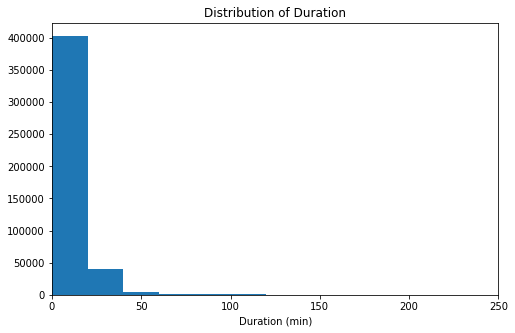

In [106]:
# start with a standard-scaled plot
plt.figure(figsize=(10,5))
binsize =20
bins = np.arange(0, ford_go_bike['duration_in_min'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = ford_go_bike, x = 'duration_in_min', bins = bins)
plt.xlim(0,250)
plt.xlabel('Duration (min)')
plt.title('Distribution of Duration')
plt.show()

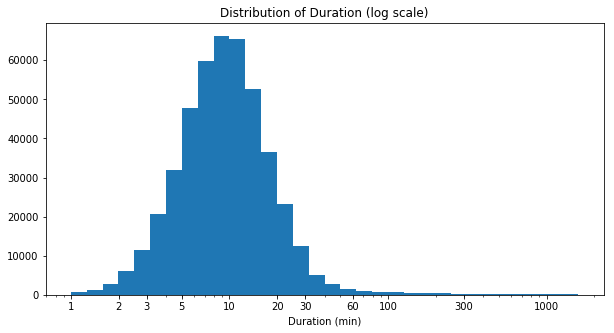

In [107]:
# plot is right skewed let's reconstruct plot again with applying log scale transformation on x axis
plt.figure(figsize=(10,5))
bins=10**np.arange(0,np.log10(ford_go_bike.duration_in_min.max())+0.1,0.1)
plt.hist(data=ford_go_bike,x='duration_in_min',bins=bins);
plt.xscale('log')
x_ticks=[1,2,3,5,10,20,30,60,100,300,1000]
plt.xticks(x_ticks,x_ticks);
plt.xlabel('Duration (min)');
plt.title('Distribution of Duration (log scale)');


>**Observation :** 
>
>After applying log transformation on duration, I can see a belly shaped curve of duration with it's peak value on 10 mins. Between the range of 1 min and 100 mins, almost each ride duration falls.

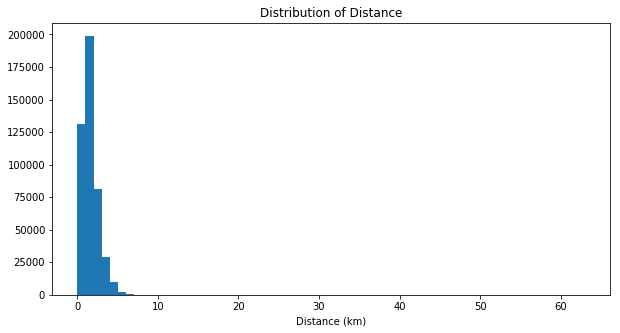

In [108]:
# plotting distance on a standard scale
plt.figure(figsize=(10,5))
binsize = 1
bins = np.arange(0, ford_go_bike['distance_in_km'].max()+binsize, binsize)
plt.hist(data = ford_go_bike, x = 'distance_in_km', bins = bins)
plt.xlabel('Distance (km)');
plt.title('Distribution of Distance');
plt.show()

>**Note :** 
>
>As I can see here that there are many entries where distance is near to 0. Let' see how many rows have distance equal to 0.

In [109]:
ford_go_bike.distance_in_km.value_counts().sort_index().head(1)

0.0    10116
Name: distance_in_km, dtype: int64

In [110]:
#let's remove all the rows where distance is 0
ford_go_bike=ford_go_bike[~(ford_go_bike.distance_in_km==0)]

In [111]:
#check of change took place or not.
ford_go_bike[ford_go_bike.distance_in_km==0]

,duration_in_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,distance_in_km,age,age_group


<Figure size 720x360 with 0 Axes>

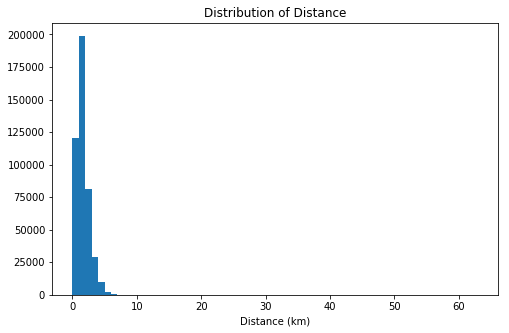

In [112]:
#let's recreate the plot on the standard scale
plt.figure(figsize=(10,5))
binsize = 1
bins = np.arange(0, ford_go_bike['distance_in_km'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = ford_go_bike, x = 'distance_in_km', bins = bins)
plt.xlabel('Distance (km)');
plt.title('Distribution of Distance');
plt.show()

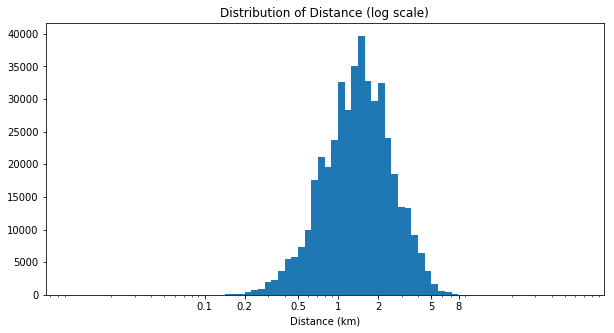

In [113]:
# plot is right skewed let's reconstruct plot again with applying log scale transformation on x axis
plt.figure(figsize=(10,5))
bins=10**np.arange(-2,np.log10(ford_go_bike.distance_in_km.max())+0.05,0.05)
plt.hist(data=ford_go_bike,x='distance_in_km',bins=bins);
plt.xscale('log')
x_ticks=[0.1,0.2,0.5,1,2,5,8]
plt.xticks(x_ticks,x_ticks);
plt.xlabel('Distance (km)');
plt.title('Distribution of Distance (log scale)');

>**Observation :**
>
>After applying log transformation on distance, I can see a shape alike to belly shape curve where almost all the distances fall between 200 meters and 8 kms.Peak of the curve is between 1 and 2 kms.  It means that users do not use Ford's service for long rides.

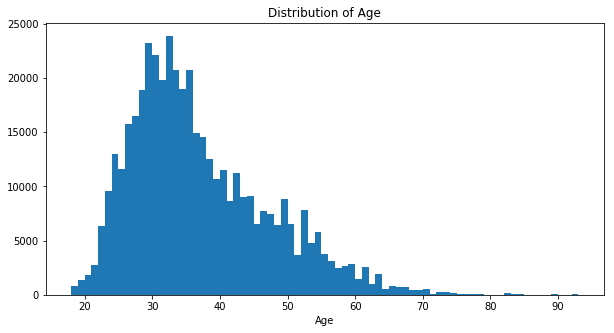

In [114]:
#plotting age on standard scale
plt.figure(figsize=(10,5))
min_age=ford_go_bike.age.min()
max_age=ford_go_bike.age.max()
bins=np.arange(min_age,max_age+1,1)
plt.hist(data=ford_go_bike,x='age',bins=bins);
plt.xlabel('age');
plt.xlabel('Age');
plt.title('Distribution of Age');


>**Observation Here :**
>
>Graph seems unimodal. Age is majorly distributed in the range 18 to 70. Peak of the curve is between 27 and 36. It means most of the users are adult and young. After 35-36, as age increases, distrbution of age decreases.

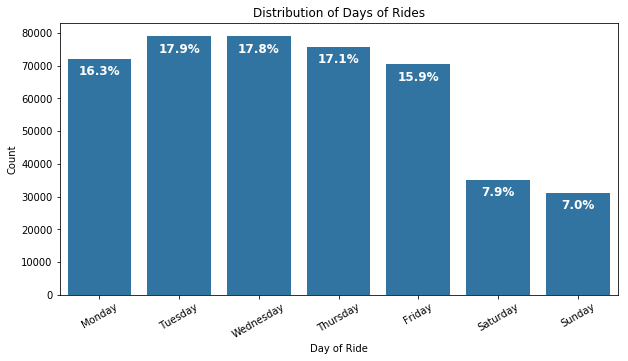

In [115]:
#plotting weekdays on which trips took place

#creating one column for day of week
ford_go_bike['start_day']=ford_go_bike.start_time.dt.day_name()

#ordering
level_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
ford_go_bike['start_day'] = ford_go_bike['start_day'].astype(ordered_cat)

start_day_dist=ford_go_bike.start_day.value_counts()
color=sb.color_palette()[0]
plt.figure(figsize=(10,5))
sb.barplot(start_day_dist.index.values,start_day_dist,color=color)
plt.xticks(rotation=30)
plt.xlabel('Day of Ride')
plt.ylabel('Count')
plt.title('Distribution of Days of Rides');

# add annotations
n_points = ford_go_bike.shape[0]
locs, labels = plt.xticks() # get the current tick locations and labels


#loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    
    # get the text property for the label to get the correct count
    count = start_day_dist[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-5000, pct_string, ha = 'center', color = 'w',fontdict={'family':'normal','weight':'bold','size':12})

>**Observation Here:**
>
>And this is a surprise. I thought on weekends, people take more rides. But it turned out in other way. Bar chart suggests that people take more rides on weekdays as compare to weekends.May be, people use this ride service to commute between office and home.
>
>
>Mondays and Fridays have a bit less ratio to other weekdays. And people are least interested in taking rides on Sundays.

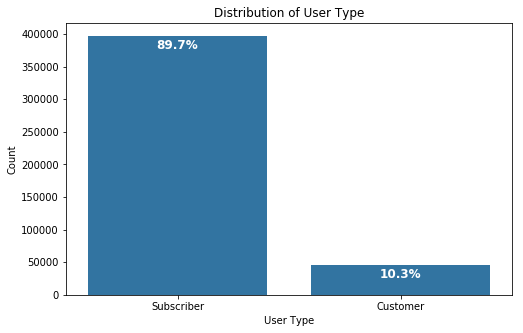

In [116]:
#plotting user type on which trips took place

user_type_dist=ford_go_bike.user_type.value_counts()

color=sb.color_palette()[0]
plt.figure(figsize=(8,5))
sb.barplot(user_type_dist.index.values,user_type_dist,color=color, order=['Subscriber','Customer'])
#plt.xticks(rotation=30)
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Distribution of User Type');

# add annotations
n_points = ford_go_bike.shape[0]
locs, labels = plt.xticks() # get the current tick locations and labels


#loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    
    # get the text property for the label to get the correct count
    count = user_type_dist[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-20000, pct_string, ha = 'center', color = 'w',fontdict={'family':'normal','weight':'bold','size':12})

>**Note :**
>
> Sunbscriber are the people who have membership of this Ford's service and customer are the people who don't have membership of the service.
>
>**Observation :**
>
>Chart suggests that almost 90% of the users who use this service have membership and 10% of remaining user don't have it.

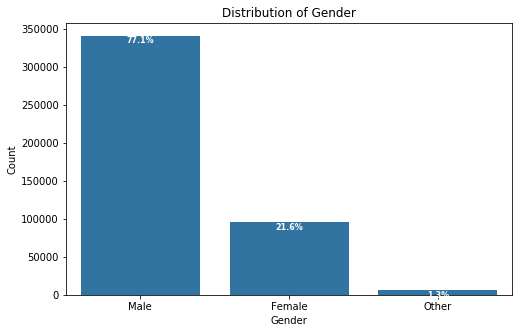

In [117]:
#plotting gender

gender_dist=ford_go_bike.member_gender.value_counts()
color=sb.color_palette()[0]
plt.figure(figsize=(8,5))
sb.barplot(gender_dist.index.values,gender_dist,color=color,order=gender_dist.index)
#plt.xticks(rotation=30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender');


# add annotations
n_points = ford_go_bike.shape[0]
locs, labels = plt.xticks() # get the current tick locations and labels


#loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    
    # get the text property for the label to get the correct count
    count = gender_dist[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-9500, pct_string, ha = 'center', color = 'w',fontdict={'family':'normal','weight':'bold','size':8})

>**Observation Here:**
>
>Plot suggests that 77% of the users are male, 21.6% of the users are female. 1.3% of the users come under other category. Ratio of female users to male users is quite low for this service.

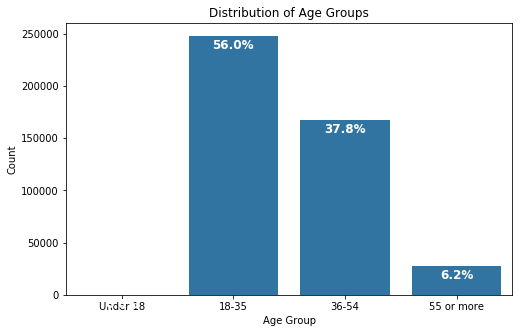

In [118]:
#plotting age_order

#ordering
level_order = ['Under 18', '18-35', '36-54', '55 or more']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
ford_go_bike['age_group'] = ford_go_bike['age_group'].astype(ordered_cat)

age_dist=ford_go_bike.age_group.value_counts()
color=sb.color_palette()[0]
plt.figure(figsize=(8,5))
sb.barplot(age_dist.index.values,age_dist,color=color)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups');

# add annotations
n_points = ford_go_bike.shape[0]
locs, labels = plt.xticks() # get the current tick locations and labels


#loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    
    # get the text property for the label to get the correct count
    count = age_dist[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-12000, pct_string, ha = 'center', color = 'w',fontdict={'family':'normal','weight':'bold','size':12})

>**Observation Here:**
>
>No user under 18.  
>
>Graph suggests that majority of users fall between 18 and 35 who took the rides. Ratio belong this age group is quite high i.e 56 %. 
>
>Then comes age group "35-54", carring almost 38% of the users and then comes the age group "55 and more" carring 6.2% of the users. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> My variable of interest is duration that is how time taken for a ride is affetced by other factors. After plotting histogram  of duration on standard scale, I found the graph to be right skewed and observed that there are ouliers too. 
>
>I checked for the outliers if they are valid or not. I found that the outliers were valid entries except 3 values which I corrected manually.To remove the skewness, I perfomed log transformation on the variable axis.
>
>I found that values for this variable is majorly distributed in the range of 1 min and 100 mins.I found that peak value for the distribution is near to 10 mins. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> After plotting histogram of the variable distance on the standard scale, I found that there were many values present near to 0. I deleted all the ride details where distance was 0 as a ride must have distance more than 0.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [119]:
numeric_vars = ['duration_in_min', 'distance_in_km','age']
categoric_vars = ['start_day', 'user_type', 'member_gender','age_group']

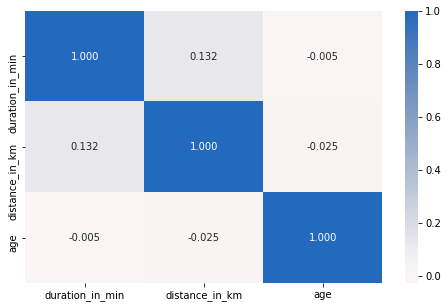

In [120]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(ford_go_bike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

>**Observation :**
>
>Surprisingly, correlation matrix shows weak positive relation between duration and distance. This seems unsual. If distance increases, duration should increase too. This point would be worth exploring further. This matrix also says that there is weak negative relation between duration and age and distance and age. Let's create scatter plot of these numeric variables and see how data points are scattered.

C:\Users\arihant\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\arihant\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\arihant\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


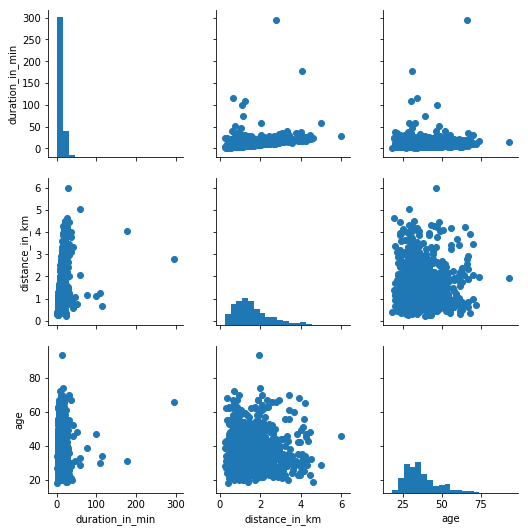

In [121]:
# plot matrix: sample 1000 trips so that plots are clearer and they render faster
samples = np.random.choice(ford_go_bike.shape[0], 1000, replace = False);
ford_go_bike_samp = ford_go_bike.loc[samples,:];

g = sb.PairGrid(data = ford_go_bike_samp, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

>**Observation Here**
>
>Scatter plot between duration and distance suggests the same. There seems no be little or no increment in duration when distance increases. Other plots conveys the same finding which we got from matrixplot: A weak negative relationship between duration and age, and between age and distance. I will need to dig more on the weak positive relation between duration and distance.

Let's look at the variables one by one.

Text(0.5, 1.0, 'Duration(log scale) vs. Distance')

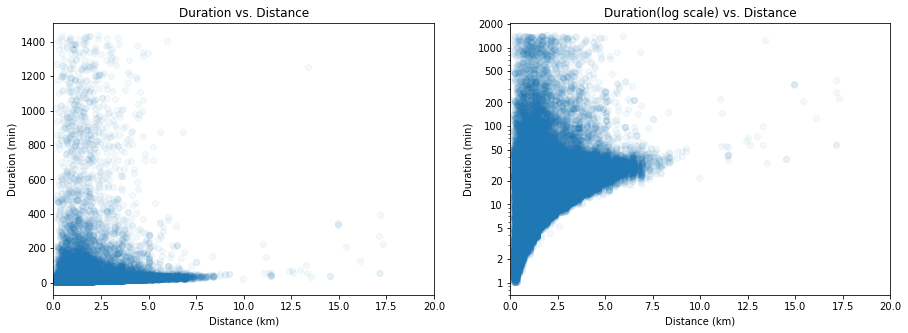

In [122]:
# scatter plot of duration vs. distance (with complete data)

plt.figure(figsize = [15, 5])

#on standard scale
plt.subplot(1,2,1)
plt.scatter(data = ford_go_bike, x = 'distance_in_km', y = 'duration_in_min',alpha=1/20)
plt.xlim([0, 20]) 
plt.xlabel('Distance (km)')
plt.ylabel('Duration (min)')
plt.title('Duration vs. Distance')


#Applying log transformation on y scale
plt.subplot(1,2,2)
plt.scatter(data = ford_go_bike, x = 'distance_in_km', y = 'duration_in_min',alpha=1/20)
plt.xlim([0, 20])
plt.xlabel('Distance (km)')
plt.yscale('log')
plt.yticks([1,2,5,10,20,50,100,200,500,1000,2000], [1,2,5,10,20,50,100,200,500,1000,2000])
plt.ylabel('Duration (min)')
plt.title('Duration(log scale) vs. Distance')



>**Observation Here**
>
>1) I see. So this is a reason why the value of r is 0.1 between duration and distance. I can see two curves in the graph. The first curve (vertically lower) suggests that as distance increases, duration does increases although not lineraly. And the second curve (vertically upper) suggests that as distance increases, duration descreses although not lineraly. And the result of these two curves mix each other an gives 0.1 as the value of r. This made sense.
>
>2) The point which is interesting here is, for the small distance(distance in the range of  0-3kms), the duration for rides vary too much. This is interesting. We will dig out more on it.
>
>3) Majority of people didn't ride beyond 8kms. I also find the same conclusion in the plot of distance distribution. Let's see the relationship between duration and age now.

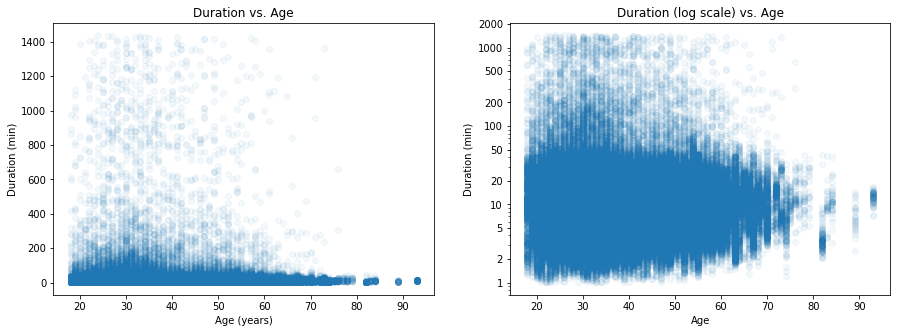

In [123]:
# scatter plot of duration vs. age

plt.figure(figsize = [15, 5])

#on standard scale
plt.subplot(1,2,1)
plt.scatter(data = ford_go_bike, x = 'age', y = 'duration_in_min',alpha=1/20)
#plt.xlim([0, 20]) 
plt.xlabel('Age (years)')
plt.ylabel('Duration (min)');
plt.title('Duration vs. Age')

#Applying log transformation on y scale
plt.subplot(1,2,2)
plt.scatter(data = ford_go_bike, x = 'age', y = 'duration_in_min',alpha=1/20)
#plt.xlim([0, 20])
plt.xlabel('Age')
plt.yscale('log')
plt.yticks([1,2,5,10,20,50,100,200,500,1000,2000], [1,2,5,10,20,50,100,200,500,1000,2000])
plt.ylabel('Duration (min)');
plt.title('Duration (log scale) vs. Age');


>**Observation :**
>
>No obvious relation is found between duration and age.

Now let's look how duration behaves with categorical variables.

In [124]:
# compute the logarithm of duration to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

ford_go_bike['log_duration_in_min'] = ford_go_bike['duration_in_min'].apply(log_trans)

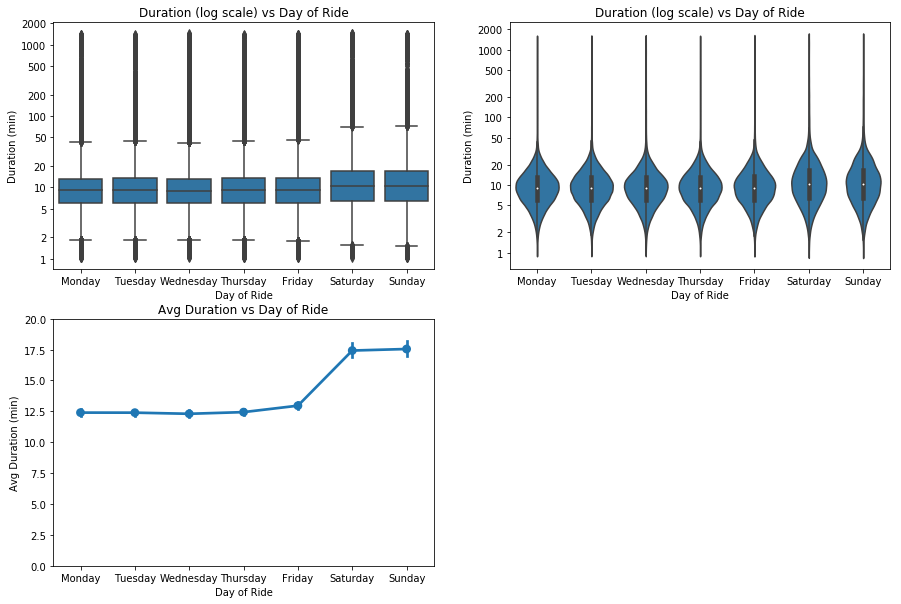

In [125]:
# bivariate plots of duration vs. start day of trip

plt.figure(figsize=(15,10))
color=sb.color_palette()[0]

#boxplot
plt.subplot(2,2,1);
sb.boxplot(data=ford_go_bike,x='start_day',y='log_duration_in_min',color=color);
plt.yticks(np.log10([1,2,5,10,20,50,100,200,500,1000,2000]), [1,2,5,10,20,50,100,200,500,1000,2000])
plt.xlabel('Day of Ride')
plt.ylabel('Duration (min)')
plt.title('Duration (log scale) vs Day of Ride')


#violin plot
plt.subplot(2,2,2);
sb.violinplot(data=ford_go_bike,x='start_day',y='log_duration_in_min',color=color);
plt.yticks(np.log10([1,2,5,10,20,50,100,200,500,1000,2000]), [1,2,5,10,20,50,100,200,500,1000,2000])
plt.xlabel('Day of Ride')
plt.ylabel('Duration (min)')
plt.title('Duration (log scale) vs Day of Ride')


#pointplot
plt.subplot(2,2,3);
sb.pointplot(data=ford_go_bike,x='start_day',y='duration_in_min',color=color);
plt.ylim(0,20);
plt.xlabel('Day of Ride')
plt.ylabel('Avg Duration (min)')
plt.title('Avg Duration vs Day of Ride');


>**Observation :**
>
>1) Median values for weekend are higher as compare to median value for weekdays. <br>
>2) Avg duration time of rides on weekends are higher to rides on weekdays. This is interesting beacuse we saw that  rides on weekends are less. I can summarize this in this way: Although users take less rides on weekends but their ride durations are higher on these days.

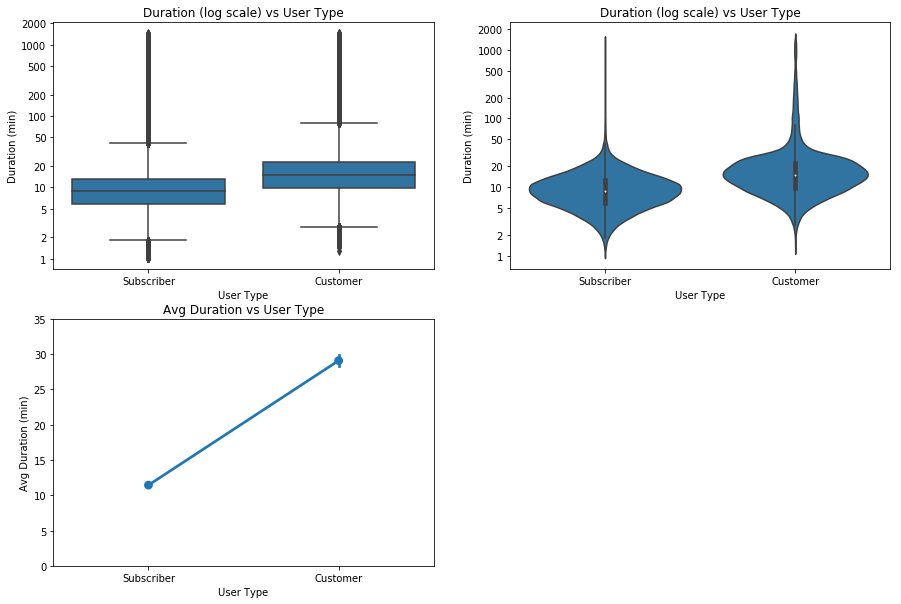

In [126]:
# bivariate plots of duration vs. user type

plt.figure(figsize=(15,10))
color=sb.color_palette()[0]

#boxplot
plt.subplot(2,2,1);
sb.boxplot(data=ford_go_bike,x='user_type',y='log_duration_in_min',color=color,order=['Subscriber','Customer']);
plt.yticks(np.log10([1,2,5,10,20,50,100,200,500,1000,2000]), [1,2,5,10,20,50,100,200,500,1000,2000])
plt.xlabel('User Type')
plt.ylabel('Duration (min)')
plt.title('Duration (log scale) vs User Type')


#violin plot
plt.subplot(2,2,2);
sb.violinplot(data=ford_go_bike,x='user_type',y='log_duration_in_min',color=color,order=['Subscriber','Customer']);
plt.yticks(np.log10([1,2,5,10,20,50,100,200,500,1000,2000]), [1,2,5,10,20,50,100,200,500,1000,2000])
plt.xlabel('User Type')
plt.ylabel('Duration (min)')
plt.title('Duration (log scale) vs User Type')


#pointplot
plt.subplot(2,2,3);
sb.pointplot(data=ford_go_bike,x='user_type',y='duration_in_min',color=color,order=['Subscriber','Customer']);
plt.ylim(0,35);
plt.xlabel('User Type')
plt.ylabel('Avg Duration (min)')
plt.title('Avg Duration vs User Type');


>**Observation Here**
>
>Surprisingly median duration for customer is higher than subscriber. And Avg duration for customer is also much higher than avg duration for subscriber. Where avg duration for customer is near to 30, it remains on 12 for subscriber.

Text(0.5, 1.0, 'Avg Duration vs Gender')

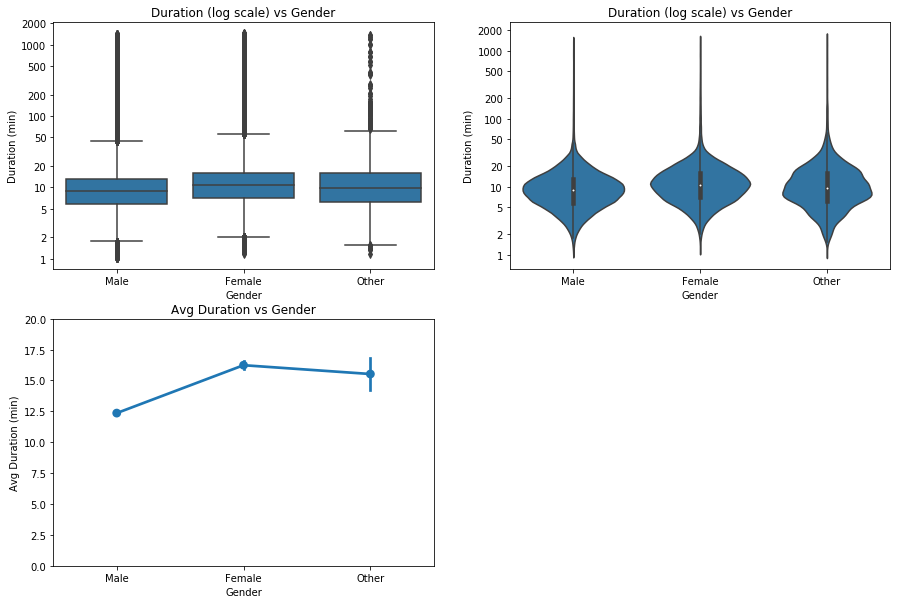

In [127]:
# bivariate plots of duration vs gender

plt.figure(figsize=(15,10))
color=sb.color_palette()[0]

#boxplot
plt.subplot(2,2,1);
sb.boxplot(data=ford_go_bike,x='member_gender',y='log_duration_in_min',color=color,order=['Male','Female','Other']);
plt.yticks(np.log10([1,2,5,10,20,50,100,200,500,1000,2000]), [1,2,5,10,20,50,100,200,500,1000,2000])
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.title('Duration (log scale) vs Gender')


#violin plot
plt.subplot(2,2,2);
sb.violinplot(data=ford_go_bike,x='member_gender',y='log_duration_in_min',color=color, order=['Male','Female','Other']);
plt.yticks(np.log10([1,2,5,10,20,50,100,200,500,1000,2000]), [1,2,5,10,20,50,100,200,500,1000,2000])
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.title('Duration (log scale) vs Gender')


#pointplot
plt.subplot(2,2,3);
sb.pointplot(data=ford_go_bike,x='member_gender',y='duration_in_min',color=color,order=['Male','Female','Other']);
plt.ylim(0,20);
plt.xlabel('Gender')
plt.ylabel('Avg Duration (min)')
plt.title('Avg Duration vs Gender')


>**Observation :**
>
>1) And here comes one more intersting point. I saw earlier that proportion of female users are less in rides as compare to proportion of male users but the graph depicts that although female users are less, ride duration is more for them.
>
>2) For Female, average duration time is highest. Followed by other and male gender.

Text(0.5, 1.0, 'Avg Duration vs Age Group')

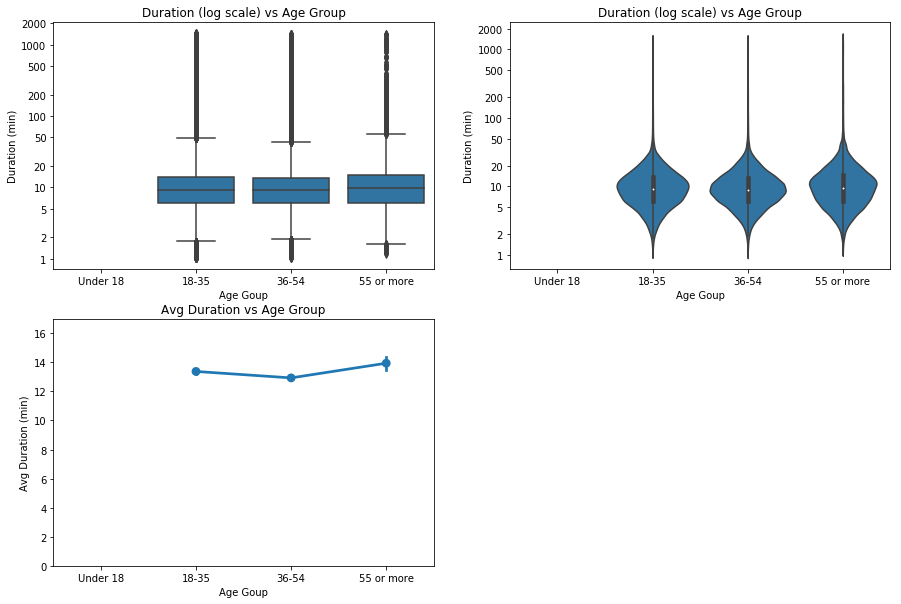

In [128]:
# bivariate plots of duration vs.age group

plt.figure(figsize=(15,10))
color=sb.color_palette()[0]

#boxplot
plt.subplot(2,2,1);
sb.boxplot(data=ford_go_bike,x='age_group',y='log_duration_in_min',color=color);
plt.yticks(np.log10([1,2,5,10,20,50,100,200,500,1000,2000]), [1,2,5,10,20,50,100,200,500,1000,2000])
plt.xlabel('Age Goup')
plt.ylabel('Duration (min)')
plt.title('Duration (log scale) vs Age Group')

#violin plot
plt.subplot(2,2,2);
sb.violinplot(data=ford_go_bike,x='age_group',y='log_duration_in_min',color=color);
plt.yticks(np.log10([1,2,5,10,20,50,100,200,500,1000,2000]), [1,2,5,10,20,50,100,200,500,1000,2000])
plt.xlabel('Age Goup')
plt.ylabel('Duration (min)')
plt.title('Duration (log scale) vs Age Group')



#pointplot
plt.subplot(2,2,3);
sb.pointplot(data=ford_go_bike,x='age_group',y='duration_in_min',color=color);
plt.ylim(0,17);
plt.xlabel('Age Goup')
plt.ylabel('Avg Duration (min)')
plt.title('Avg Duration vs Age Group')


>**Observation Here**
>
>Median for all the age groups is almost equal, a bit higher for the '55 or more' age group. Average duration for the all the age groups are also almost same. A bit lower for the age group '36-54' and a bit higher for the age group '55 or more' to the respect of age group '18-35'.

Now let's look at the the relationship between other variables.

Text(0.5, 1.0, 'Age Group vs Gender')

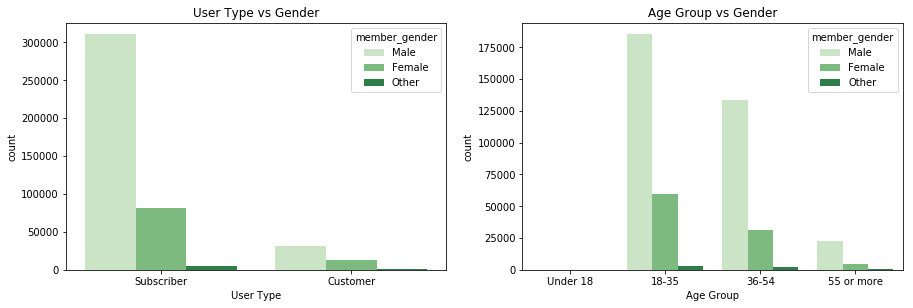

In [129]:
# bivariate plots of gender vs user type and gender vs age_group

plt.figure(figsize=(15,10))
color=sb.color_palette()[0]

#cluster chart between gender and user type
plt.subplot(2,2,1);
sb.countplot(data=ford_go_bike,x='user_type',hue='member_gender',order=['Subscriber','Customer'],hue_order=['Male','Female','Other'],palette='Greens');
plt.xlabel('User Type')
plt.title('User Type vs Gender')


#cluster chart between gender and age_group
plt.subplot(2,2,2);
sb.countplot(data=ford_go_bike,x='age_group',hue='member_gender',hue_order=['Male','Female','Other'],palette='Greens');
plt.xlabel('Age Group')
plt.title('Age Group vs Gender')


>**Observation Here:**
>
>In both the user types, males are more. Followed by females and other gender users.
>
>In all the age category, males are more. Followed by females and other gender users. As we move towards older groups, population of males,feamles and other gender users decreases.

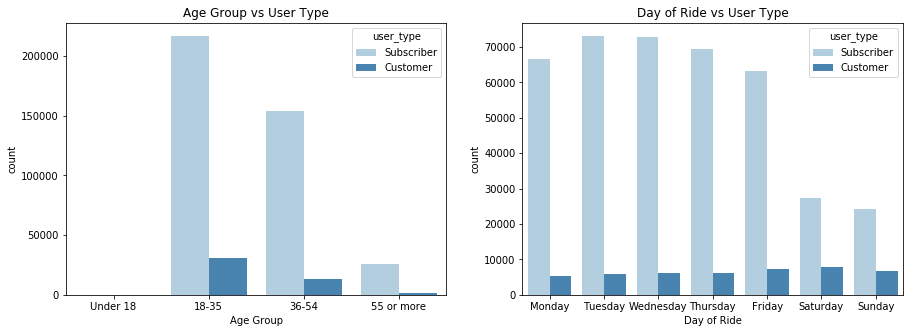

In [130]:
# bivariate plots of user type vs age group and user type vs day or ride

plt.figure(figsize=(15,5))
color=sb.color_palette()[0]

#cluster chart between user type and age group
plt.subplot(1,2,1);
sb.countplot(data=ford_go_bike,x='age_group',hue='user_type',hue_order=['Subscriber','Customer'],palette='Blues');
plt.xlabel('Age Group')
plt.title('Age Group vs User Type')

#cluster chart between user_type and day or ride
plt.subplot(1,2,2);
sb.countplot(data=ford_go_bike,x='start_day',hue='user_type',hue_order=['Subscriber','Customer'],palette='Blues');
plt.xlabel('Day of Ride')
plt.title('Day of Ride vs User Type');


>**Observation here**
>
>For each age group, subscribers are more as compare to customer. As we move towards older age groups, counts of both the user type decreases.
>
>Second plot is interesting, subscribers take more ride on weekdays as compare to weekends but any day subscribers takes more ride than customers. Customers take more ride on saturday.

Text(0.5, 1.0, 'Avg Distance vs User Type')

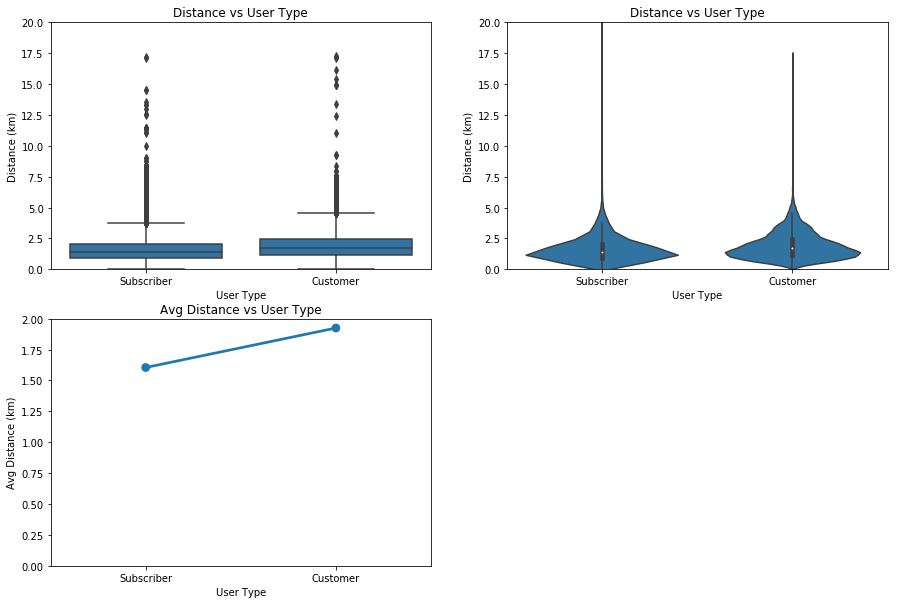

In [131]:
# bivariate plots of distance vs. user type

plt.figure(figsize=(15,10))
color=sb.color_palette()[0]

#boxplot
plt.subplot(2,2,1);
sb.boxplot(data=ford_go_bike,x='user_type',y='distance_in_km',color=color,order=['Subscriber','Customer']);
plt.ylim(0,20);
plt.xlabel('User Type')
plt.ylabel('Distance (km)')
plt.title('Distance vs User Type')

#violin plot
plt.subplot(2,2,2);
sb.violinplot(data=ford_go_bike,x='user_type',y='distance_in_km',color=color,order=['Subscriber','Customer']);
plt.ylim(0,20);
plt.xlabel('User Type')
plt.ylabel('Distance (km)')
plt.title('Distance vs User Type')

#pointplot
plt.subplot(2,2,3);
sb.pointplot(data=ford_go_bike,x='user_type',y='distance_in_km',color=color,order=['Subscriber','Customer']);
plt.ylim(0,2);
plt.xlabel('User Type')
plt.ylabel('Avg Distance (km)')
plt.title('Avg Distance vs User Type')

>**Observation:**
>
>Median distance for customer type users are more as compare to subscriber type users and average distance for customer type users is also higher as compare to averag distance for subscriber type users, although to a smaller degree.
>
>So average ride duration for customer type users is also higher (which is found earlier) and  average distance for customer type users is also higher as compare to subscriber type user.

Text(0.5, 1.0, 'Avg Distance vs Gender')

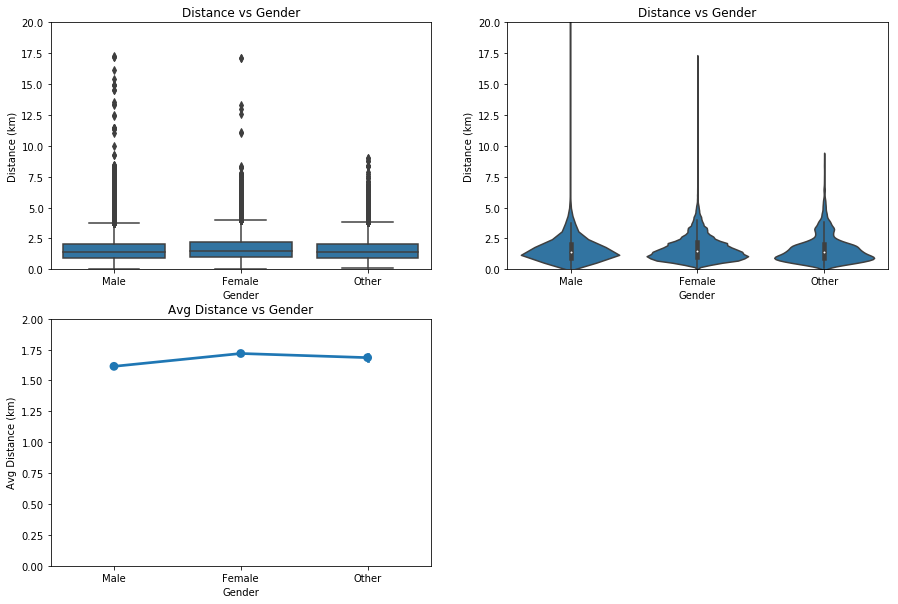

In [132]:
# bivariate plots of distance vs. gender

plt.figure(figsize=(15,10))
color=sb.color_palette()[0]

#boxplot
plt.subplot(2,2,1);
sb.boxplot(data=ford_go_bike,x='member_gender',y='distance_in_km',color=color,order=['Male','Female','Other']);
plt.ylim(0,20);
plt.xlabel('Gender')
plt.ylabel('Distance (km)')
plt.title('Distance vs Gender')

#violin plot
plt.subplot(2,2,2);
sb.violinplot(data=ford_go_bike,x='member_gender',y='distance_in_km',color=color,order=['Male','Female','Other']);
plt.ylim(0,20);
plt.xlabel('Gender')
plt.ylabel('Distance (km)')
plt.title('Distance vs Gender')

#pointplot
plt.subplot(2,2,3);
sb.pointplot(data=ford_go_bike,x='member_gender',y='distance_in_km',color=color,order=['Male','Female','Other']);
plt.ylim(0,2);
plt.xlabel('Gender')
plt.ylabel('Avg Distance (km)')
plt.title('Avg Distance vs Gender')

>**Observation :**
>
>Median distance for all the gender types is amlost equal. Average ride distance for all the gender is almost same although for female gender, it is a bit higher than male and other genders.


Text(0.5, 1.0, 'Avg Distance vs Age Group')

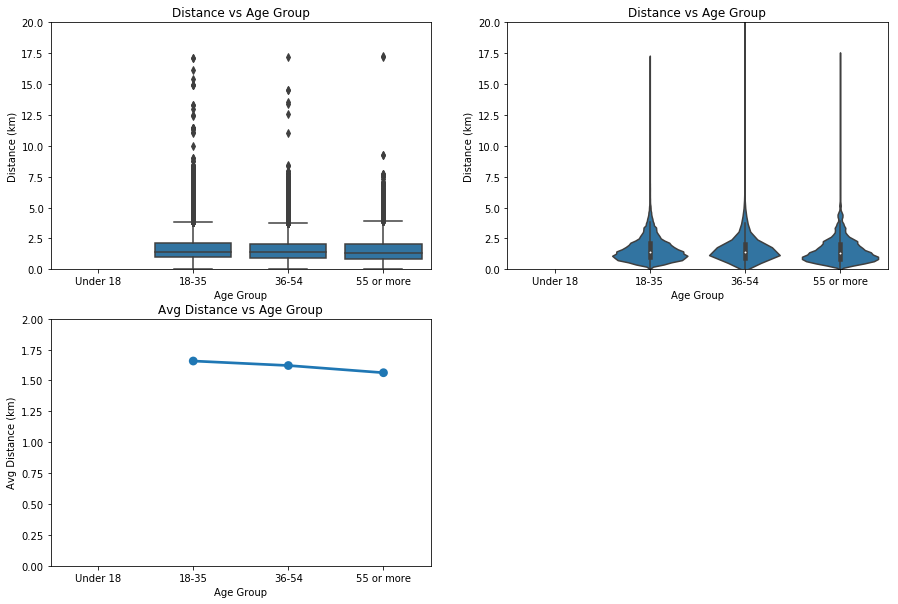

In [133]:
# bivariate plots of distance vs. age group

plt.figure(figsize=(15,10))
color=sb.color_palette()[0]

#boxplot
plt.subplot(2,2,1);
sb.boxplot(data=ford_go_bike,x='age_group',y='distance_in_km',color=color);
plt.ylim(0,20);
plt.xlabel('Age Group')
plt.ylabel('Distance (km)')
plt.title('Distance vs Age Group')

#violin plot
plt.subplot(2,2,2);
sb.violinplot(data=ford_go_bike,x='age_group',y='distance_in_km',color=color);
plt.ylim(0,20);
plt.xlabel('Age Group')
plt.ylabel('Distance (km)')
plt.title('Distance vs Age Group')


#pointplot
plt.subplot(2,2,3);
sb.pointplot(data=ford_go_bike,x='age_group',y='distance_in_km',color=color);
plt.ylim(0,2);
plt.xlabel('Age Group')
plt.ylabel('Avg Distance (km)')
plt.title('Avg Distance vs Age Group')

>**Observation Here**
>
>Median distance and average distance is almost same for all the age groups.  A bit of decline in average distance if we more towards old age groups.
>

Text(0.5, 1.0, 'Avg Distance vs Day of Ride')

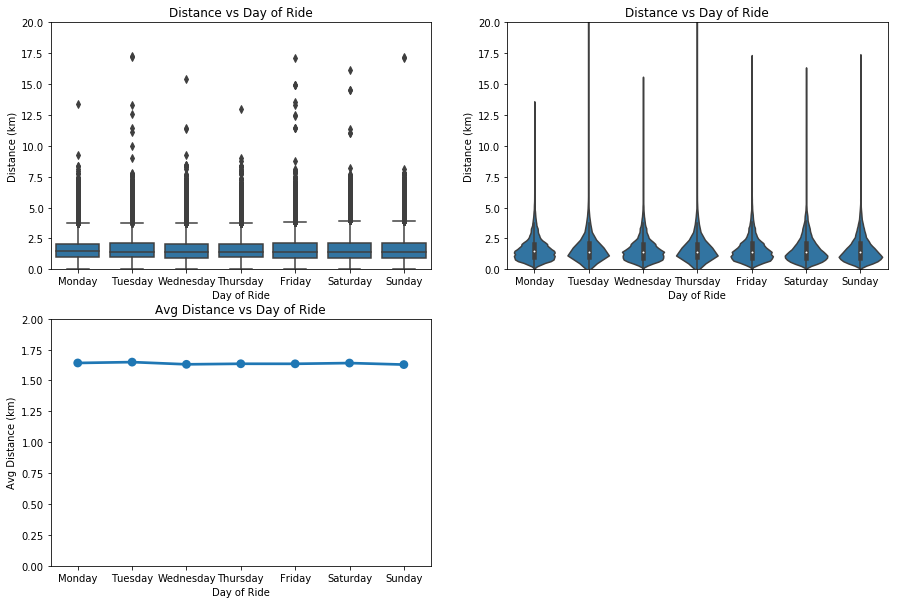

In [134]:
# bivariate plots of distance vs. day fo ride

plt.figure(figsize=(15,10))
color=sb.color_palette()[0]

#boxplot
plt.subplot(2,2,1);
sb.boxplot(data=ford_go_bike,x='start_day',y='distance_in_km',color=color);
plt.ylim(0,20);
plt.xlabel('Day of Ride')
plt.ylabel('Distance (km)')
plt.title('Distance vs Day of Ride')

#violin plot
plt.subplot(2,2,2);
sb.violinplot(data=ford_go_bike,x='start_day',y='distance_in_km',color=color);
plt.ylim(0,20);
plt.xlabel('Day of Ride')
plt.ylabel('Distance (km)')
plt.title('Distance vs Day of Ride')


#pointplot
plt.subplot(2,2,3);
sb.pointplot(data=ford_go_bike,x='start_day',y='distance_in_km',color=color);
plt.ylim(0,2);
plt.xlabel('Day of Ride')
plt.ylabel('Avg Distance (km)')
plt.title('Avg Distance vs Day of Ride')

>**Observation :**
>
> Median distance and average distance remain same for all the days.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that my feature of interest i.e. duration has more than one relationship with distance. In some cases, as distance increases, duration increases and in some cases if formar increases, latter decreases. I will try to dig out more on this in the multivariate exploration.
>
>I found a relationship beteewn duration and start day of trip and i.e average ride duration of rides on weekends are higher as compare to weekdays.
>
>I observed a relationship between duration and user type and i.e for customer type users, average ride duration is more as compare to subscriber type users.
>
>I found a relationship between duration and gender and i.e for female, average ride duration is higest. Followed by other and male gender.
>
>Other remaining factors had no or little effect on duration variable.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, I looked relationship between other features as well and found that:
>
>In both the user types, males are more. Followed by females and other gender users.In all the age category, males are more. Followed by females and other gender users.
>
>For each age group, subscribers are more as compare to customers. Subscribers take more ride on weekdays as compare to weekends but any day subscribers take more ride than customers. Customers take more ride on saturday.
>
>Average ride distance for customer type users is higher as compare to subscriber type user.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the categorical variables (gender, user type, age group and start day or trip) play into the relationship between duration and distance.

Text(0.5, 0.98, 'Duration vs Distance by Gender')

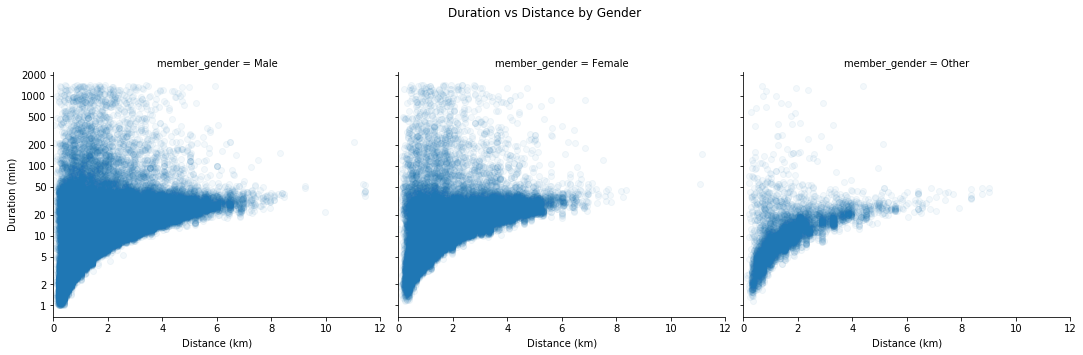

In [135]:
#duration vs distance vs gender
g=sb.FacetGrid(data=ford_go_bike,col='member_gender',col_order=['Male','Female','Other'],height=5)
g.map(plt.scatter,'distance_in_km','log_duration_in_min',alpha=1/20);
plt.yticks(np.log10([1,2,5,10,20,50,100,200,500,1000,2000]), [1,2,5,10,20,50,100,200,500,1000,2000]);
plt.xlim(0,12);
g.set_xlabels('Distance (km)');
g.set_ylabels('Duration (min)');

#setting title
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Duration vs Distance by Gender')


>**Observation :**
>
>I can see that males take more ride duration for samller distance for 0-3kms (They do take less time too for the same duration ).This effect fades away if move from male to other gender.

Text(0.5, 0.98, 'Duration vs Distance by User Type')

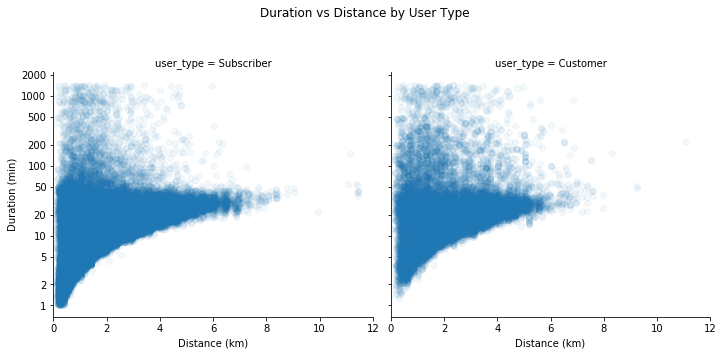

In [136]:
#duration vs distance vs user_type
g=sb.FacetGrid(data=ford_go_bike,col='user_type',col_order=['Subscriber','Customer'],height=5)
g.map(plt.scatter,'distance_in_km','log_duration_in_min',alpha=1/20);
plt.yticks(np.log10([1,2,5,10,20,50,100,200,500,1000,2000]), [1,2,5,10,20,50,100,200,500,1000,2000]);
plt.xlim(0,12);
g.set_xlabels('Distance (km)');
g.set_ylabels('Duration (min)');

#setting title
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Duration vs Distance by User Type')

>**Observation :**
>
>Customer type users take more ride duration for samller distance like 0-3kms (They do take less time too for the same duration ).This effect is less for subscriber type users.

Text(0.5, 0.98, 'Duration vs Distance by Age Group')

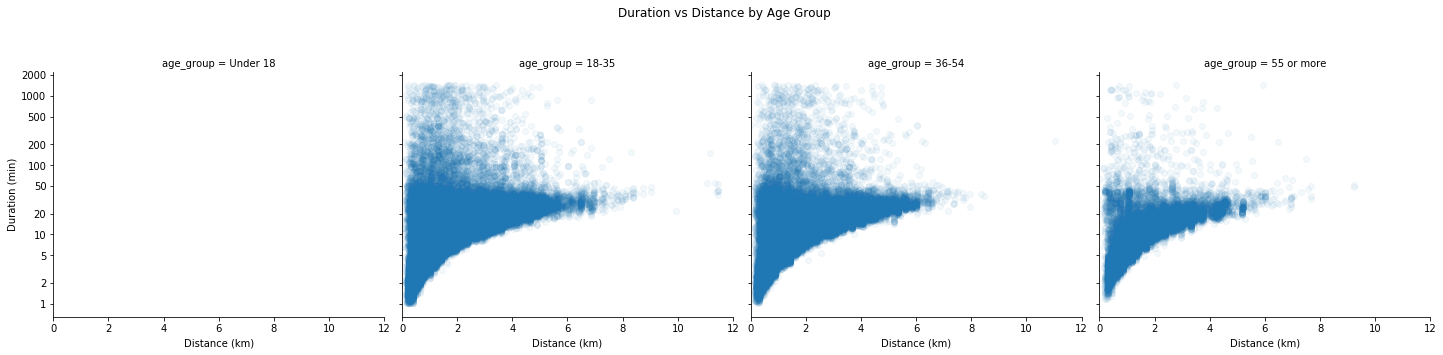

In [137]:
#duration vs distance vs age_group
g=sb.FacetGrid(data=ford_go_bike,col='age_group',height=5)
g.map(plt.scatter,'distance_in_km','log_duration_in_min',alpha=1/20);
plt.yticks(np.log10([1,2,5,10,20,50,100,200,500,1000,2000]), [1,2,5,10,20,50,100,200,500,1000,2000]);
plt.xlim(0,12);
g.set_xlabels('Distance (km)');
g.set_ylabels('Duration (min)');

#setting title
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Duration vs Distance by Age Group')

>**Observation :**
>
>Users in age group 18 to 35 range take more ride duration for samller distance like 0-3kms (They do take less time too for the same duration ).This effect fades away if we move to older age groups.

Text(0.5, 0.98, 'Duration vs Distance by Day of Ride')

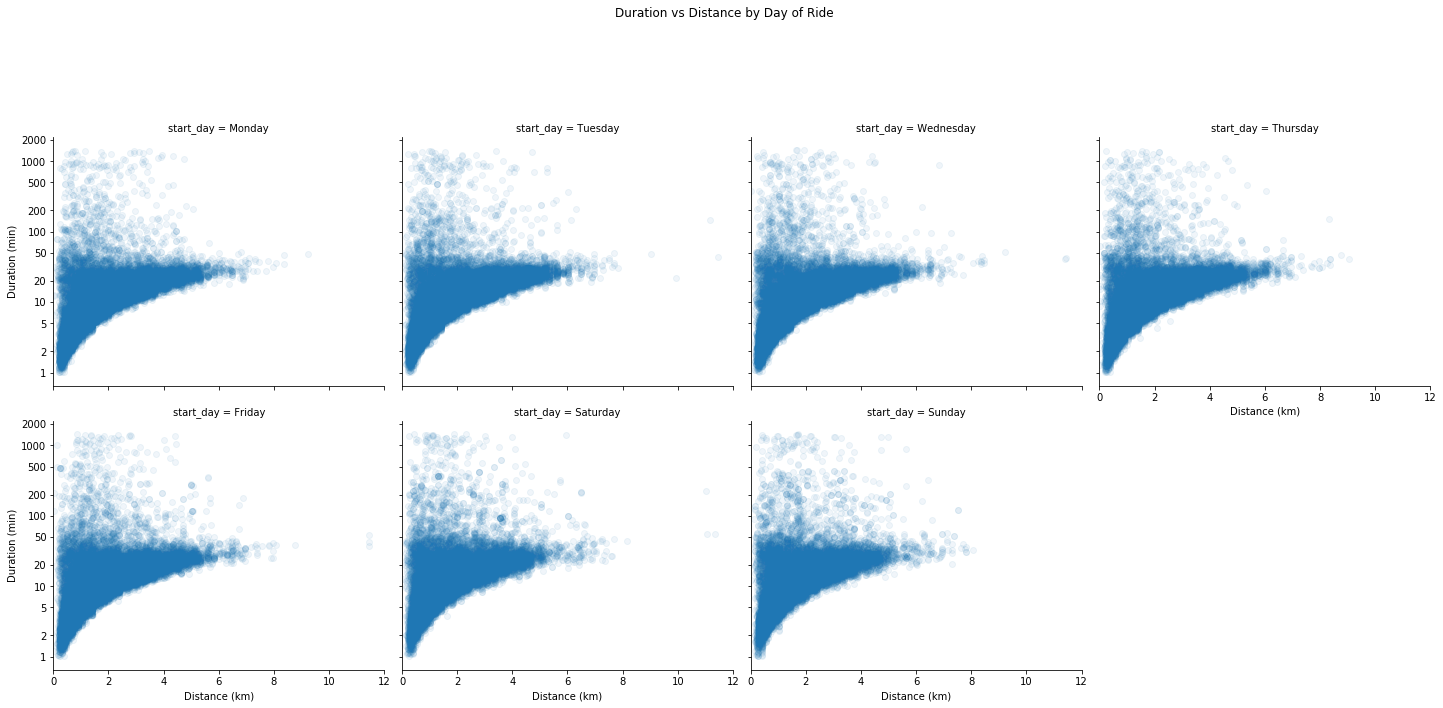

In [138]:
#duration vs distance vs day or ride
g=sb.FacetGrid(data=ford_go_bike,col='start_day',height=5,col_wrap=4)
g.map(plt.scatter,'distance_in_km','log_duration_in_min',alpha=1/15);
plt.yticks(np.log10([1,2,5,10,20,50,100,200,500,1000,2000]), [1,2,5,10,20,50,100,200,500,1000,2000]);
plt.xlim(0,12);
g.set_xlabels('Distance (km)');
g.set_ylabels('Duration (min)');

#setting title
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Duration vs Distance by Day of Ride')

>**Observation :**
>
>No obvious relationship found.
>

**Other multivariate exporations:**

Text(0.5, 1.0, 'Average Distance by Ride of Day and Gender')

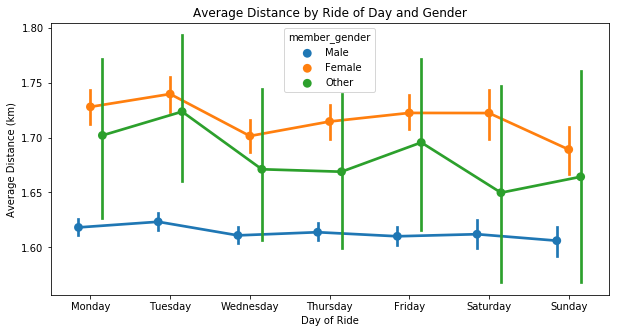

In [139]:
#distance vs day or ride vs gender
plt.figure(figsize=(10,5))
sb.pointplot(data = ford_go_bike, x = 'start_day', y = 'distance_in_km', hue = 'member_gender',hue_order=['Male','Female','Other'],
                  dodge = 0.3);

plt.xlabel('Day of Ride')
plt.ylabel('Average Distance (km)')
plt.title('Average Distance by Ride of Day and Gender')

>**Observation :**
>
>Female users have highest average distance covered on any day of the week. Followed by other users and then male users.

Text(0.5, 1.0, 'Average Distance by Ride of Day and Gender')

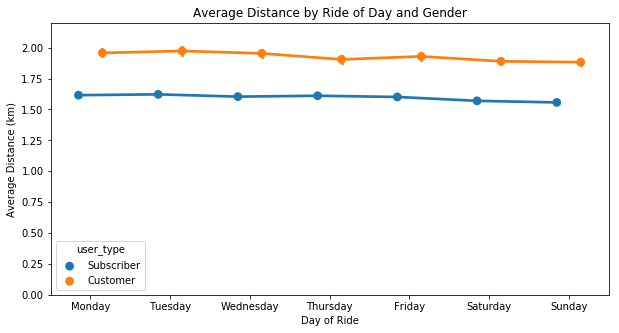

In [140]:
#distance vs day or ride vs user type
plt.figure(figsize=(10,5))
sb.pointplot(data = ford_go_bike, x = 'start_day', y = 'distance_in_km', hue = 'user_type',hue_order=['Subscriber','Customer'],
                  dodge = 0.3);
plt.ylim(0,2.2)
plt.xlabel('Day of Ride')
plt.ylabel('Average Distance (km)')
plt.title('Average Distance by Ride of Day and Gender')

>**Observation :**
>
>Customer type users have highest average distance covered on any day of the week as compare to subscriber type users.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of duration against distance in this section by looking at the impact of the categorical features. The multivariate exploration here showed that there is indeed an effect of these variables on duration, but in the dataset, this is initially hidden. I found that for the samller distance, ride duration increases if male users or customer type users or users having age between 18-35 come into the picture. This was interesting. 

### Were there any interesting or surprising interactions between features?

> I looked at two differnt multivariate graph and found two interesting points:
*    Female users have highest average distance covered on any day of the week. Followed by other gender users and then male users.
*    Customer type users have highest average distance covered on any day of the week as compare to subscriber type users.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!